# **Actividad 5**

In [ ]:
#Importamos bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [ ]:
#Leemos el archivo de datos de la estación climatológica para crear un dataframe con la biblioteca Pandas
url = "https://raw.githubusercontent.com/TonyReyesM/Fisica-Computacional/master/Actividad%201/Datos%20diarios%203074.txt"
df = pd.read_csv(url)

#Los datos comienzan en el renglon 19.
#El último renglón del archivo no tiene datos
#Los nombres de las 5 columnas son "Fecha", "Precip (mm)", "Evap (mm)", "Tmax (ºC)", "Tmin (ºC)"
#Creamos una lista de los nombres de las 5 columnas
columnas = ['Fecha','Precip','Evap','Tmax','Tmin']
#Creamos el nuevo dataframe sin los primeros 15 renglones ni el último renglón
clima = pd.read_csv(url, names=columnas, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')
#Visualizamos el dataframe creado
#clima
#Exploramos el principio y el final del dataframe
#print(clima.head(10))
#print(clima.tail(10))

#Analizamos las dimensiones del dataframe y vemos los renglones y las columnas respectivamente.
#clima.shape

#Creamos una copia del dataframe para trabajar con ella y no modificar el original
clima_cp0 = clima.copy()
#clima_cp0.head()

#Remplazamos con un espacio en blanco los valores donde esté escrito "Nulo"
clima_cp1 = clima_cp0.replace(to_replace = 'Nulo',value = '', regex = True)

#Convertimos a datos numéricos la información de las columnas de precipitación, evaporación, temperatura máxima, y temperatura mínina
#Utilizamos una iteración para cambiar los datos de cada columna de una por una
for i in columnas[1:]:
  clima_cp1[i] = pd.to_numeric(clima_cp1[i], errors = 'coerce')

#Visualizamos los primeros datos del dataframe para verificar que se realizaron los cambios
#clima_cp1.head()

#Revisamos la información que hay en el dataframe nuevo
#clima_cp1.info()

#Revisamos la cantidad de datos faltantes que hay en el archivo
#clima_cp1.isnull().sum()

#Revisamos el principio y final del dataframe
#print(clima_cp1.head())
#print(clima_cp1.tail())

#Hacemos un análisis estadístico con 3 cifras significativas del dataframe para después interpretarlo
#clima_cp1.describe().round(3)

#Ahora cambiaremos la información de la columna de fechas para cambiarlos a un formato de fecha y tiempo que python reconozca
#Primero generamos una copia del dataframe por si hay necesidad de utilizarlo de nuevo
clima_cp2 = clima_cp1.copy()

#Cambiamos los valores de la columna de fechas con el día al principio
clima_cp2['Fecha'] = pd.to_datetime(clima['Fecha'], dayfirst = True)
#print(clima_cp2.head())

#Revisamos los tipos de variables que hay en cada columna
#clima_cp2.dtypes

#Creamos dos nuevas columnas para el año y el mes
clima_cp2['Año'] = clima_cp2['Fecha'].dt.year
clima_cp2['Mes'] = clima_cp2['Fecha'].dt.month

#Revisamos el dataframe
#print(clima_cp2.head())
#print(clima_cp2.tail())

#Revisamos la información en las columnas de año y mes y que sean de valores enteros
#clima_cp2.info()

#Creamos el archivo con el que trabajaremos para la siguiente actividad
#Revisamos la información en el archivo e imprimimos los primeros y los últimos datos
dat_meteor = clima_cp2.copy()
#dat_meteor.info()
#print(dat_meteor.head())
#print(dat_meteor.tail())

#Eliminamos la columna "Mes" para crear una nueva que denote cada mez con su nombre en lugar de un entero utilizando la función dt.strftime(%b)
#donde %b sirve para representar los meses por sus nombres
dat_meteor.drop("Mes", axis=1, inplace=True)
dat_meteor['Mes'] = dat_meteor['Fecha'].dt.strftime('%b')
dat_meteor.info()
print(dat_meteor.head())
print(dat_meteor.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27175 entries, 0 to 27174
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   27175 non-null  datetime64[ns]
 1   Precip  26956 non-null  float64       
 2   Evap    24242 non-null  float64       
 3   Tmax    27165 non-null  float64       
 4   Tmin    27166 non-null  float64       
 5   Año     27175 non-null  int64         
 6   Mes     27175 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.5+ MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1940-01-01     0.0   4.2  23.0  16.0  1940  Jan
1 1940-01-02     0.0   5.1  23.0  16.0  1940  Jan
2 1940-01-03     0.0   4.6  24.2  16.5  1940  Jan
3 1940-01-04     0.0   4.2  23.6  16.4  1940  Jan
4 1940-01-05     0.0   5.7  23.2  18.2  1940  Jan
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
27170 2017-12-27     0.0   4.6  29.2  15.0  2017  Dec
27171 2

In [ ]:
#Creamos una copia del dataframe para que sea nuestra serie de tiempo, de la cual la variable "Fecha" será el nuevo índice
dat_meteorTS = dat_meteor.copy()
dat_meteorTS = dat_meteorTS.set_index('Fecha')
#Revisamos que lo que hicimos es lo deseado
dat_meteorTS.info()
print(dat_meteorTS.head())
print(dat_meteorTS.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27175 entries, 1940-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  26956 non-null  float64
 1   Evap    24242 non-null  float64
 2   Tmax    27165 non-null  float64
 3   Tmin    27166 non-null  float64
 4   Año     27175 non-null  int64  
 5   Mes     27175 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 1.5+ MB
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
1940-01-01     0.0   4.2  23.0  16.0  1940  Jan
1940-01-02     0.0   5.1  23.0  16.0  1940  Jan
1940-01-03     0.0   4.6  24.2  16.5  1940  Jan
1940-01-04     0.0   4.2  23.6  16.4  1940  Jan
1940-01-05     0.0   5.7  23.2  18.2  1940  Jan
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
2017-12-27     0.0   4.6  29.2  15.0  2017  Dec
2017-12-28     0.0   3.4  27.5  16.0 

In [ ]:
#Seleccionaremos un conjunto de años de 30 años  
#El archivo tiene datos desde 1940 hasta el 2017, así que tomaremos desde 1988 hasta el 2017, de 1958 a 1987, y de 1940 a 1957 para tener un conjunto de series de tiempo 
dat_metTS1 = dat_meteorTS[(dat_meteorTS['Año'] >= 1940) & (dat_meteorTS['Año'] <= 1957)]
dat_metTS2 = dat_meteorTS[(dat_meteorTS['Año'] >= 1958) & (dat_meteorTS['Año'] <= 1987)]
dat_metTS3 = dat_meteorTS[(dat_meteorTS['Año'] >= 1988) & (dat_meteorTS['Año'] <= 2017)]

In [ ]:
#Utilizaremos los últimos 30 años (de 1988 al 2017)
dat_met30_2.head()

,Precip,Evap,Tmax,Tmin,Año,Mes
Fecha,,,,,,
1988-01-01,0.0,4.8,20.5,15.0,1988,Jan
1988-01-02,0.0,5.7,20.0,14.5,1988,Jan
1988-01-03,0.0,5.5,21.5,13.5,1988,Jan
1988-01-04,0.0,4.0,23.0,7.0,1988,Jan
1988-01-05,0.0,3.5,30.0,6.0,1988,Jan


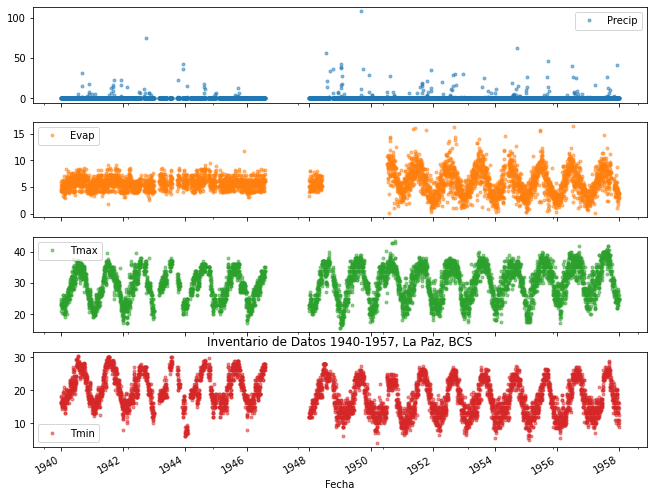

In [ ]:
#Visualizamos los datos de 1940 a 1957 para ver los datos faltantes.
cols = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin (ºC)']
axes = dat_metTS1[cols].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
plt.title('Inventario de Datos 1940-1957, La Paz, BCS');

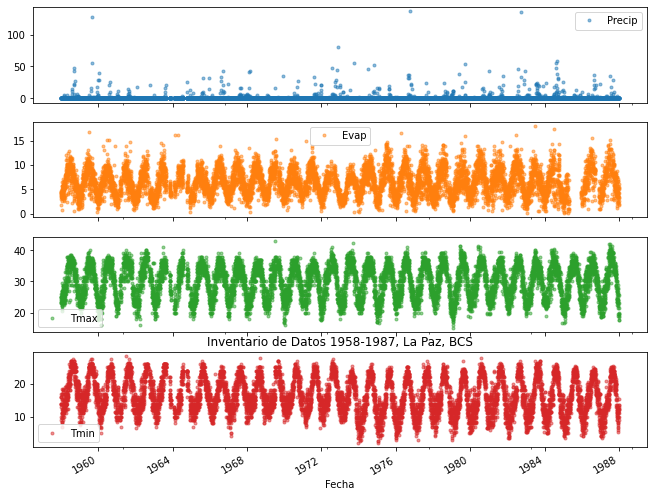

In [ ]:
#Visualizamos los datos de 1958 a 1987 para ver los datos faltantes.
cols = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin (ºC)']
axes = dat_metTS2[cols].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
plt.title('Inventario de Datos 1958-1987, La Paz, BCS');

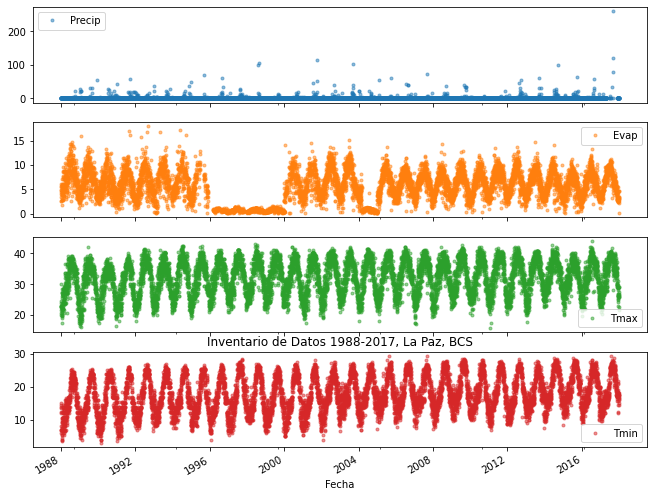

In [ ]:
#Visualizamos los datos de 1988 a 2017 para ver los datos faltantes.
cols = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin (ºC)']
axes = dat_metTS3[cols].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
plt.title('Inventario de Datos 1988-2017, La Paz, BCS');

**Actividad 1:** Explora tus datos de Precipitación en los últimos años.
*   Grafica todo el rango de datos utilizando la función df.plot()
*   Analiza un año específico completo, utiliza la función df.loc() para seleccionar el rango de datos. 
*   Grafica la estacionalidad de tus datos por mes utilizando la función sns.barplot()

Variación en Precipitación promedio entre 1940-1957 a 1958-1987: 0.08036496671456672
Variación en Precipitación promedio entre 1958-1987 a 1988-2017: 0.03751993505529427


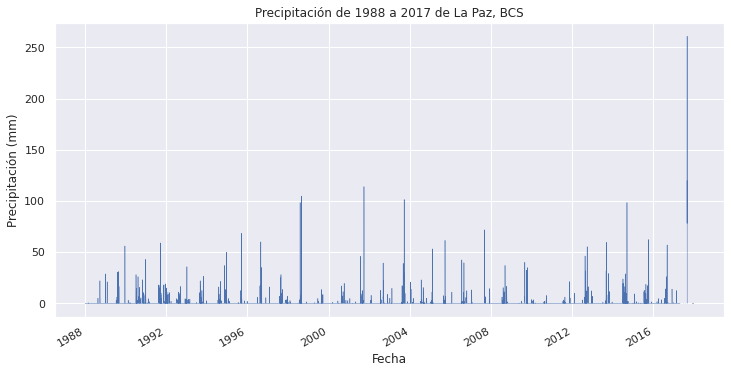

In [ ]:
#Graficamos la Precipitación de los últimos 30 años (1988 hasta 2017)
#Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Calculamos algunos promedios de cada época
Precip_pTS1 = dat_metTS1.Precip.mean()
Precip_pTS2 = dat_metTS2.Precip.mean()
Precip_pTS3 = dat_metTS3.Precip.mean()
# Graficamos la precipitación de 1987 a la actualidad
dat_metTS3['Precip'].plot(linewidth=0.5)
plt.ylabel('Precipitación (mm)');
plt.title('Precipitación de 1988 a 2017 de La Paz, BCS')

# Calculamos diferencias de los promedios de precipitación
print('Variación en Precipitación promedio entre 1940-1957 a 1958-1987:', Precip_pTS2-Precip_pTS1)
print('Variación en Precipitación promedio entre 1958-1987 a 1988-2017:', Precip_pTS3-Precip_pTS2)

Text(0.5, 1.0, 'Precipitación en el año 2000 de La Paz, BCS')

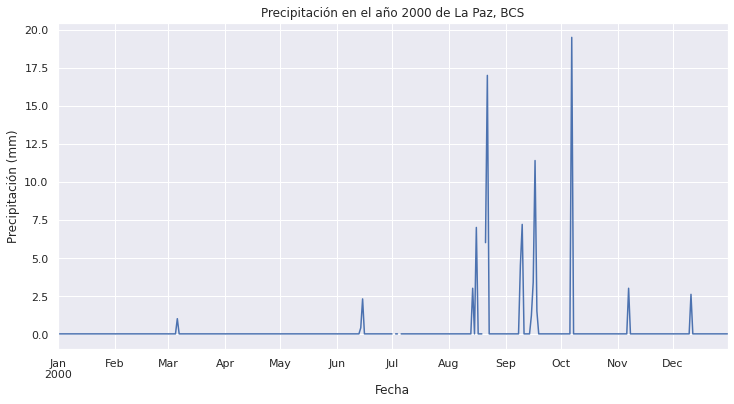

In [ ]:
# Revisamos la precipitación del año 2000
ax = dat_metTS3.loc['2000', 'Precip'].plot()
ax.set_ylabel('Precipitación (mm)');
plt.title('Precipitación en el año 2000 de La Paz, BCS')

Text(0.5, 1.0, 'Precipitación por mes de La Paz, BCS (1988-2017)')

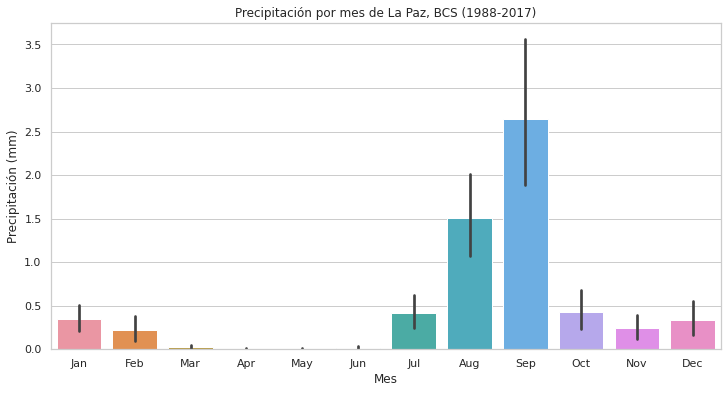

In [ ]:
#Revisamos la estacionalidad de la precipitación graficándola por mes.
sns.set_style("whitegrid")
sns.barplot(data=dat_metTS3, y="Precip", x="Mes");
plt.ylabel("Precipitación (mm)");
plt.title("Precipitación por mes de La Paz, BCS (1988-2017)")

**Actividad 2:** Explora tus datos de Temperaturas Máxima y Mínima de los últimos 30 años datos a partir de 1990.  Trata de construir dos subgráficas contiguas.
*   Grafica todo el rango de datos utilizando la función df.plot(), incluye una línea punteada mostrando el promedio.
*   Analiza un año específico completo para las dos Temperaturas, con apoyo de la función df.loc()
*   Grafica la estacionalidad filtrando tus datos por mes y utilizando la función sns.boxplot(), incluye una línea punteada mostrando el promedio.

Variación en Temperatura máxima promedio entre 1940-1957 a 1958-1987: 0.18815761725883462
Variación en Temperatura máxima promedio entre 1958-1987 a 1988-2017: 2.1481635314642347
Variación en Temperatura mínima promedio entre 1940-1957 a 1958-1987: -2.0917695609203193
Variación en Temperatura mínima promedio entre 1958-1987 a 1988-2017: 1.3010222907155544


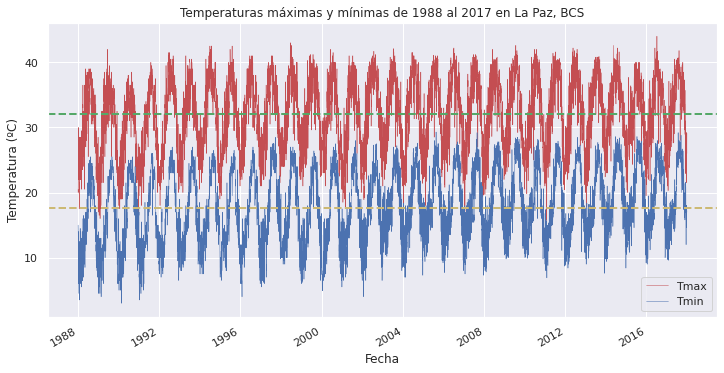

In [ ]:
#Graficamos las Temperaturas máximas y mínimas de los últimos 30 años (1988 hasta 2017)
#Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Calculamos algunos promedios de cada época
Tmax_pTS1 = dat_metTS1.Tmax.mean()
Tmax_pTS2 = dat_metTS2.Tmax.mean()
Tmax_pTS3 = dat_metTS3.Tmax.mean()
Tmin_pTS1 = dat_metTS1.Tmin.mean()
Tmin_pTS2 = dat_metTS2.Tmin.mean()
Tmin_pTS3 = dat_metTS3.Tmin.mean()

# Graficamos las temperaturas máximas y mínimas de 1987 a la actualidad
dat_metTS3['Tmax'].plot(linewidth=0.5, color = 'r', label = 'Tmax', legend = True);
dat_metTS3['Tmin'].plot(linewidth=0.5, color = 'b', label = 'Tmin', legend = True);
plt.axhline(y=Tmax_pTS3, color="g", linestyle="--", linewidth=2, label="Tmax prom")
plt.axhline(y=Tmin_pTS3, color="y", linestyle="--", linewidth=2, label="Tmin_prom")
plt.ylabel('Temperatura (ºC)');
plt.title("Temperaturas máximas y mínimas de 1988 al 2017 en La Paz, BCS")

# Calculamos diferencias de los promedios de temperaturas máximas y mínimas
print('Variación en Temperatura máxima promedio entre 1940-1957 a 1958-1987:', Tmax_pTS2-Tmax_pTS1)
print('Variación en Temperatura máxima promedio entre 1958-1987 a 1988-2017:', Tmax_pTS3-Tmax_pTS2)
print('Variación en Temperatura mínima promedio entre 1940-1957 a 1958-1987:', Tmin_pTS2-Tmin_pTS1)
print('Variación en Temperatura mínima promedio entre 1958-1987 a 1988-2017:', Tmin_pTS3-Tmin_pTS2)

Text(0.5, 1.0, 'Temperaturas máximas y mínimas en el 2000 en La Paz, BCS')

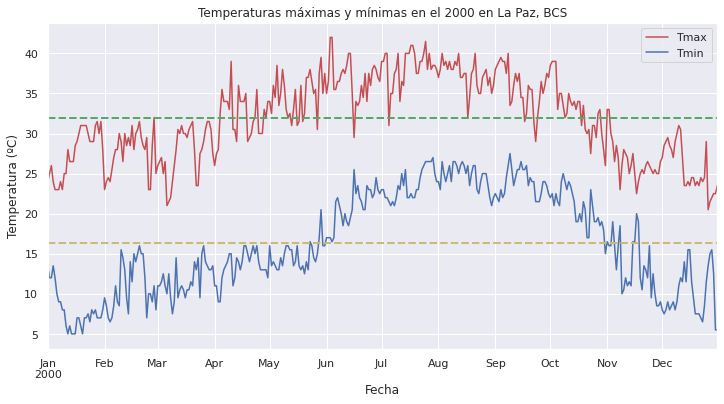

In [ ]:
#Calculamos los promedios de temperaturas del año 2000
Tmax_p2000 = dat_metTS3.loc['2000', 'Tmax'].mean()
Tmin_p2000 = dat_metTS3.loc['2000', 'Tmin'].mean()

#Revisamos las temperaturas máximas y mínimas del año 2000
ax1 = dat_metTS3.loc['2000', 'Tmax'].plot(color = 'r', legend = True)
ax1.set_ylabel('Temperatura (ºC)');
ax2 = dat_metTS3.loc['2000', 'Tmin'].plot(color = 'b', legend = True)
ax2.set_ylabel('Temperatura (ºC)');
plt.axhline(y=Tmax_p2000, color="g", linestyle="--", linewidth=2, label="Tmax prom")
plt.axhline(y=Tmin_p2000, color="y", linestyle="--", linewidth=2, label="Tmax prom")
plt.title("Temperaturas máximas y mínimas en el 2000 en La Paz, BCS")

Text(0.5, 1.0, 'Temperaturas máximas por mes de La Paz, BCS (1988-2017)')

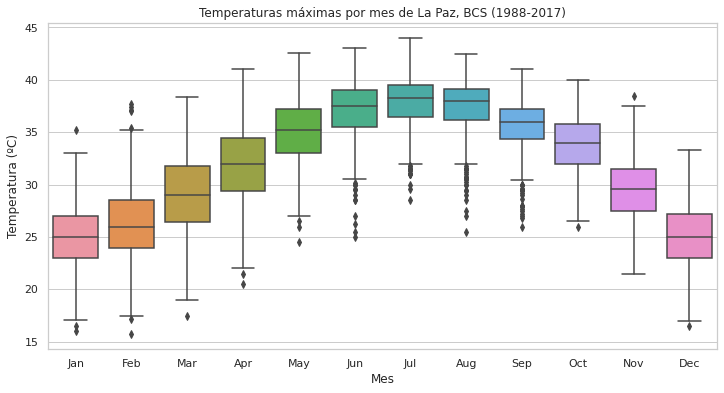

In [ ]:
#Revisamos la estacionalidad de las temperaturas máximas y mínimas graficándolas por mes.
sns.set_style("whitegrid")
sns.boxplot(data=dat_metTS3, y="Tmax", x="Mes");
plt.ylabel("Temperatura (ºC)");
plt.title("Temperaturas máximas por mes de La Paz, BCS (1988-2017)")

Text(0.5, 1.0, 'Temperaturas mínimas por mes de La Paz, BCS (1988-2017)')

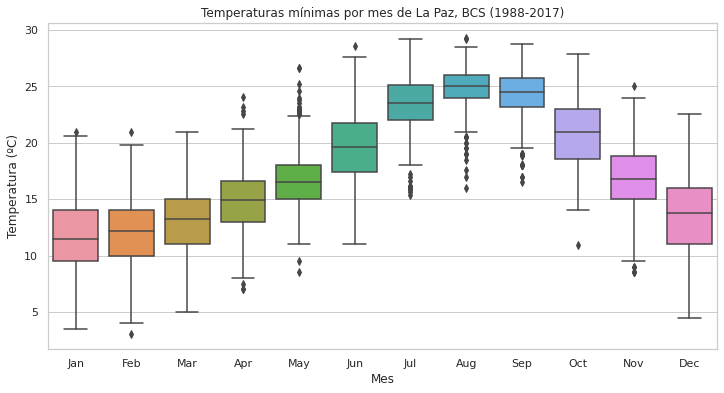

In [ ]:
#Revisamos la estacionalidad de las temperaturas mínimas graficándolas por mes.
sns.set_style("whitegrid")
sns.boxplot(data=dat_metTS3, y="Tmin", x="Mes");
plt.ylabel("Temperatura (ºC)");
plt.title("Temperaturas mínimas por mes de La Paz, BCS (1988-2017)")

**Actividad 3:** Realiza el mismo análisis que en la Actividad 2, pero para la variable de Evaporación.

Variación en Evaporación promedio entre 1940-1957 a 1958-1987: 0.6058165233324608
Variación en Evaporación promedio entre 1958-1987 a 1988-2017: -0.9036398598328157


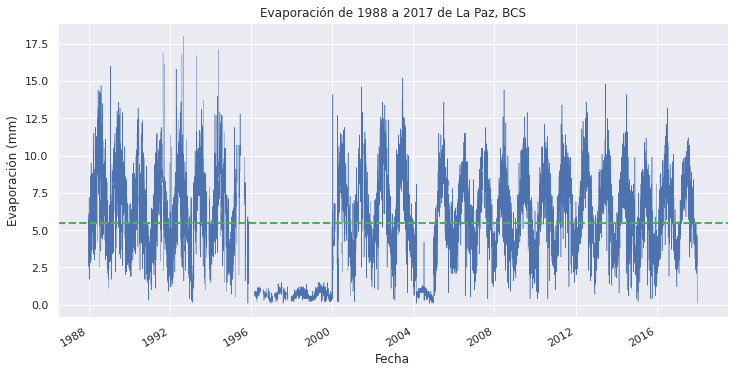

In [ ]:
#Graficamos la Evaporación de los últimos 30 años (1988 hasta 2017)
#Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Calculamos algunos promedios de cada época
Evap_pTS1 = dat_metTS1.Evap.mean()
Evap_pTS2 = dat_metTS2.Evap.mean()
Evap_pTS3 = dat_metTS3.Evap.mean()

# Graficamos la evaporación de 1987 a la actualidad
dat_metTS3['Evap'].plot(linewidth=0.5);
plt.ylabel('Evaporación (mm)');
plt.axhline(y=Evap_pTS3, color="g", linestyle="--", linewidth=2, label="Evap prom")
plt.title('Evaporación de 1988 a 2017 de La Paz, BCS')

# Calculamos diferencias de los promedios de evaporación
print('Variación en Evaporación promedio entre 1940-1957 a 1958-1987:', Evap_pTS2-Evap_pTS1)
print('Variación en Evaporación promedio entre 1958-1987 a 1988-2017:', Evap_pTS3-Evap_pTS2)

Text(0.5, 1.0, 'Evaporación en el año 2000 de La Paz, BCS')

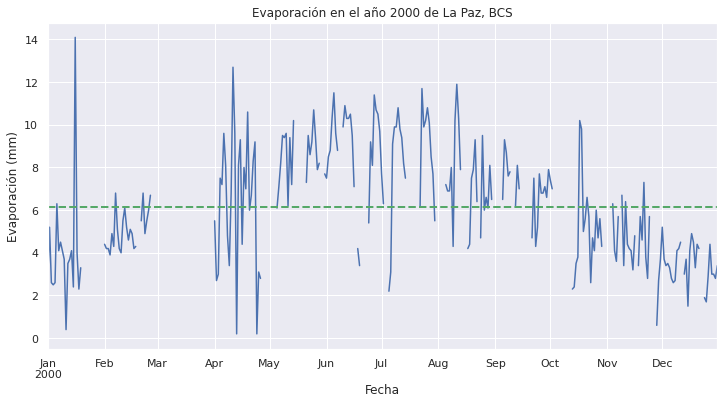

In [ ]:
#Calculamos el promedio de evaporación del año 2000
Evap_p2000 = dat_metTS3.loc['2000', 'Evap'].mean()

#Revisamos la evaporación del año 2000
ax = dat_metTS3.loc['2000', 'Evap'].plot()
ax.set_ylabel('Evaporación (mm)');
plt.axhline(y=Evap_p2000, color="g", linestyle="--", linewidth=2, label="Evap prom")
plt.title('Evaporación en el año 2000 de La Paz, BCS')

Text(0.5, 1.0, 'Evaporación por mes de La Paz, BCS (1988-2017)')

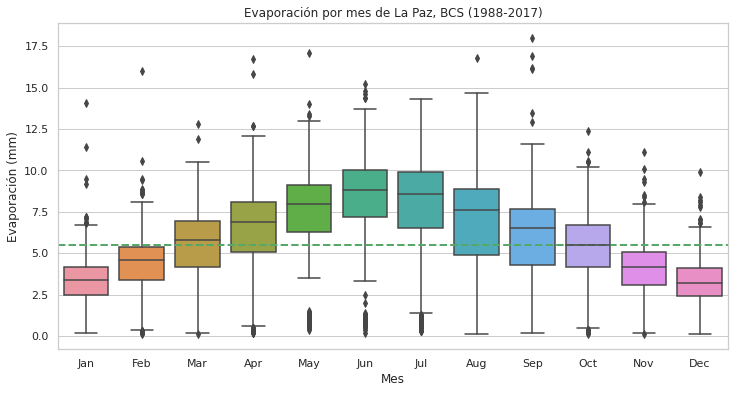

In [ ]:
#Revisamos la estacionalidad de la evaporación graficándola por mes.
sns.set_style("whitegrid")
sns.boxplot(data=dat_metTS3, y="Evap", x="Mes");
plt.ylabel("Evaporación (mm)");
plt.axhline(y=Evap_pTS3, color="g", linestyle="--", linewidth=2, label="Evap prom");
plt.title("Evaporación por mes de La Paz, BCS (1988-2017)")

**Actividad 4:**  Crea nuevos DataFrames de las Temperaturas y la Evaporación con promedios móviles de 7, 30 y 365 días, utilizando la función df.rolling(). Explora tus datos:
*   Para un año de datos, contrastando los datos diarios con el promedio móvil de 7 y 30 días. 
*   Explora para 10 o más años de datos, contrastando los datos diarios con las gráficas de promedio móvil de 365 días.

In [ ]:
#Suavizando curvas
#Creamos los promedios móviles para 7, 30 y 365 días
colList=["Evap","Tmax","Tmin"]

#Serie de tiempo 1940-1957
prom7TS1=dat_metTS1[colList].rolling(7, center=True, min_periods=1).mean()
prom30TS1=dat_metTS1[colList].rolling(30, center=True, min_periods=1).mean()
prom365TS1=dat_metTS1[colList].rolling(365, center=True, min_periods=1).mean()

#Serie de tiempo 1958-1987
prom7TS2=dat_metTS2[colList].rolling(7, center=True, min_periods=1).mean()
prom30TS2=dat_metTS2[colList].rolling(30, center=True, min_periods=1).mean()
prom365TS2=dat_metTS2[colList].rolling(365, center=True, min_periods=1).mean()

#Serie de tiempo 1988-2017
prom7TS3=dat_metTS3[colList].rolling(7, center=True, min_periods=1).mean()
prom30TS3=dat_metTS3[colList].rolling(30, center=True, min_periods=1).mean()
prom365TS3=dat_metTS3[colList].rolling(365, center=True, min_periods=1).mean()

***Contraste de datos diarios con promedios móviles de 7 y 30 días del año 2000***

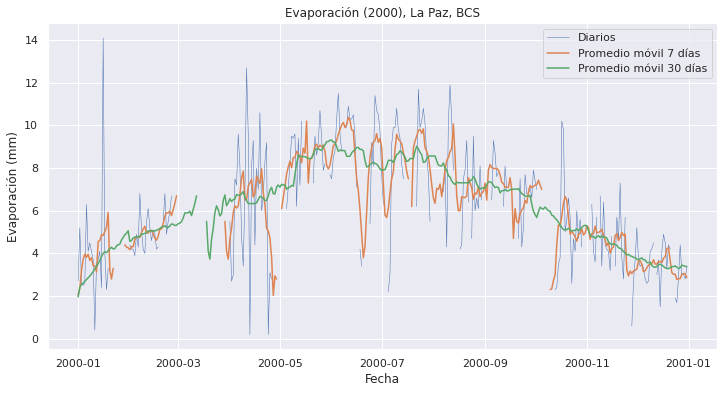

In [ ]:
#Gráfica para la evaporación del año 2000
# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 y 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(dat_metTS3.loc['2000', 'Evap'], linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(prom7TS3.loc['2000', 'Evap'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(prom30TS3.loc['2000', 'Evap'], linestyle='-', label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Evaporación (mm)')
ax.set_title('Evaporación (2000), La Paz, BCS')
ax.legend();

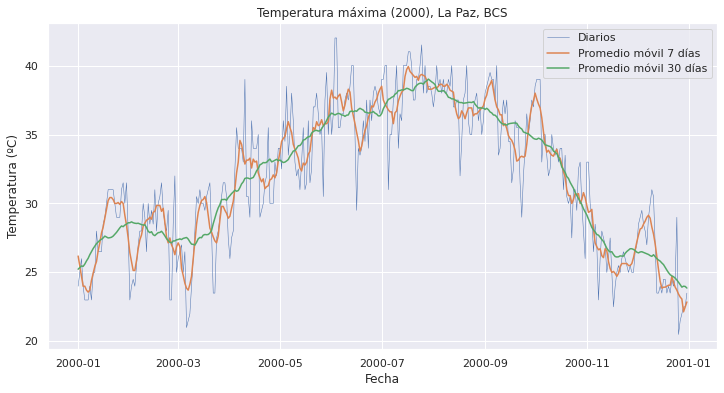

In [ ]:
#Gráfica para la temperatura máxima del año 2000
# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 y 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(dat_metTS3.loc['2000', 'Tmax'], linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(prom7TS3.loc['2000', 'Tmax'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(prom30TS3.loc['2000', 'Tmax'], linestyle='-', label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (ºC)')
ax.set_title('Temperatura máxima (2000), La Paz, BCS')
ax.legend();

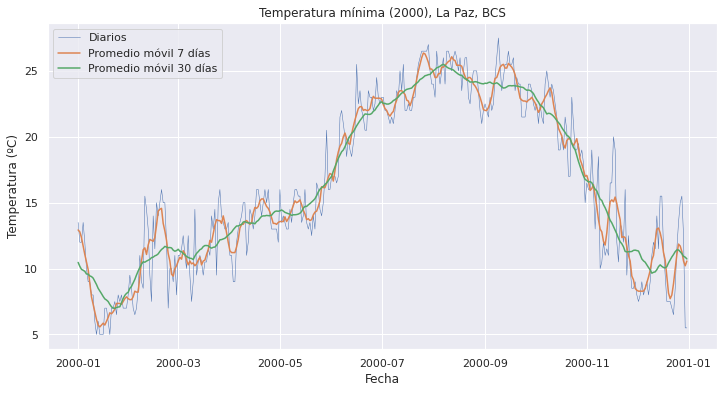

In [ ]:
#Gráfica para la temperatura máxima del año 2000
# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 y 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(dat_metTS3.loc['2000', 'Tmin'], linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(prom7TS3.loc['2000', 'Tmin'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(prom30TS3.loc['2000', 'Tmin'], linestyle='-', label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (ºC)')
ax.set_title('Temperatura mínima (2000), La Paz, BCS')
ax.legend();

***Contraste de datos diarios con promedio de 365 días del 2005 al 2017***

In [ ]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2005-01', '2017-12'

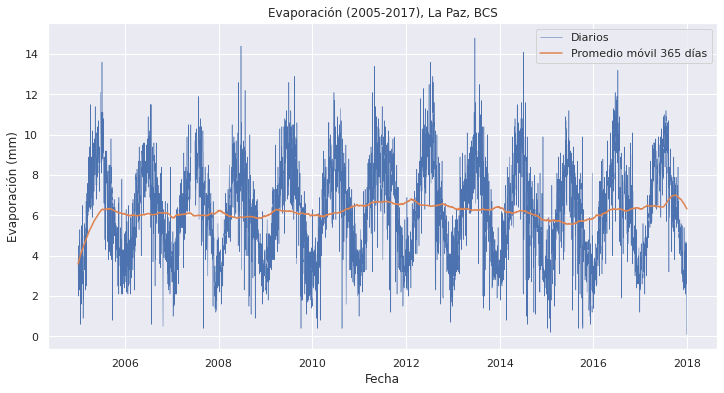

In [ ]:
#Gráfica para la evaporación del año 2005-2017
#Contraste de la gráfica de datos diarios y la de promedio móvil de 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(dat_metTS3.loc[start:end, 'Evap'], linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(prom365TS3.loc[start:end, 'Evap'], linestyle='-', label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Evaporación (mm)')
ax.set_title('Evaporación (2005-2017), La Paz, BCS')
ax.legend();

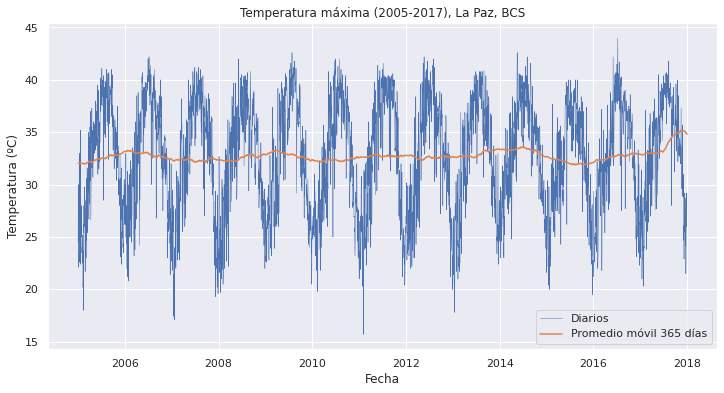

In [ ]:
#Gráfica para la temperatura máxima del año 2005-2017
#Contraste de la gráfica de datos diarios y la de promedio móvil de 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(dat_metTS3.loc[start:end, 'Tmax'], linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(prom365TS3.loc[start:end, 'Tmax'], linestyle='-', label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (ºC)')
ax.set_title('Temperatura máxima (2005-2017), La Paz, BCS')
ax.legend();

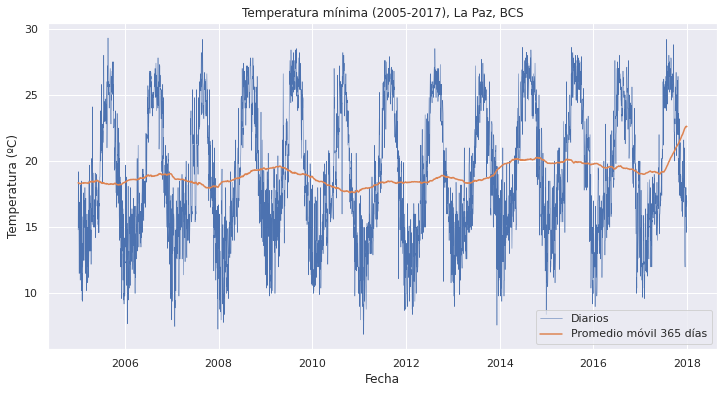

In [ ]:
#Gráfica para la temperatura mínima del año 2005-2017
#Contraste de la gráfica de datos diarios y la de promedio móvil de 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(dat_metTS3.loc[start:end, 'Tmin'], linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(prom365TS3.loc[start:end, 'Tmin'], linestyle='-', label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (ºC)')
ax.set_title('Temperatura mínima (2005-2017), La Paz, BCS')
ax.legend();

**Actividad 5:** Utiliza la biblioteca statsmodels.tsa de Python, para realizar una descomposición de una serie de tiempo: Serie Observada = Tendencia + Estacionalidad + Residuo. Aplica la función seasonal_decompose para lograr esto, a los datos de Temperaturas Tmax y Tmin, y si tienes datos de Evaporación, selecciona un periodo que haya datos. La función de seasonal_decompose aplica su propio promedio móvil a las series de datos para su análisis.  

***Análisis de tendencia: Evaporación***

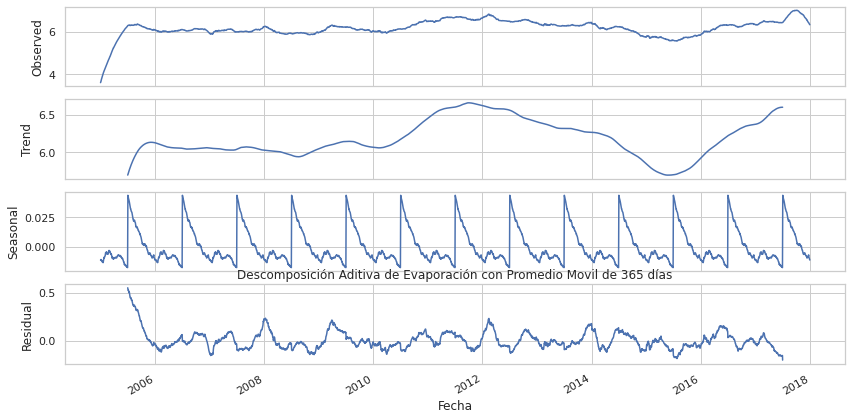

In [ ]:
# Descomposición de Series de Tiempo para Evaporación
# Uso de la biblioteca 'statsmodel'
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

# Rango de datos
start, end = "2005-01", "2017-12"

# Ciclo anual
frec365=365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
g = sm.tsa.seasonal_decompose(prom365TS3.loc[start:end, "Evap"].interpolate(), freq=frec365, model="additive" )
g.plot()
plt.title("Descomposición Aditiva de Evaporación con Promedio Movil de 365 días");

***Análisis de tendencia: Temperaturas máximas***

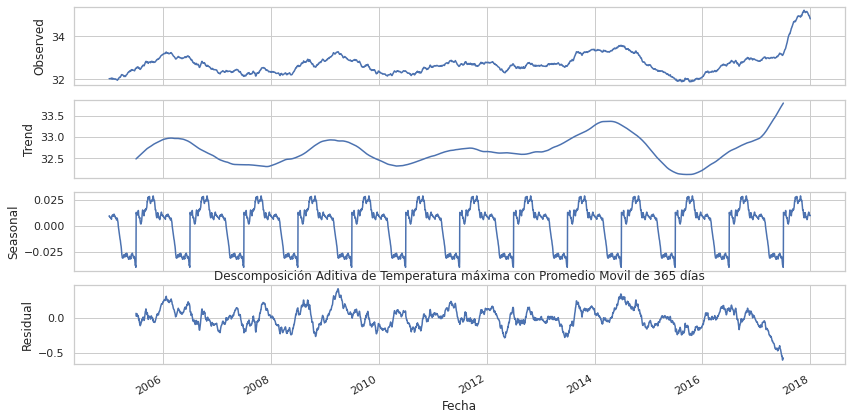

In [ ]:
# Descomposición de Series de Tiempo para Temperaturas máximas
# Uso de la biblioteca 'statsmodel'
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

# Rango de datos
start, end = "2005-01", "2017-12"

# Ciclo anual
frec365=365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
g = sm.tsa.seasonal_decompose(prom365TS3.loc[start:end, "Tmax"].interpolate(), freq=frec365, model="additive" )
g.plot()
plt.title("Descomposición Aditiva de Temperatura máxima con Promedio Movil de 365 días");

***Análisis de tendencia: Temperaturas mínimas***

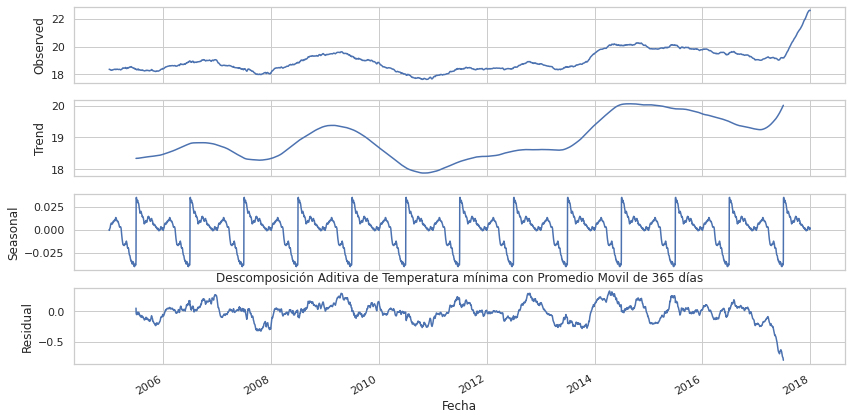

In [ ]:
# Descomposición de Series de Tiempo para Temperaturas mínimas
# Uso de la biblioteca 'statsmodel'
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

# Rango de datos
start, end = "2005-01", "2017-12"

# Ciclo anual
frec365=365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
g = sm.tsa.seasonal_decompose(prom365TS3.loc[start:end, "Tmin"].interpolate(), freq=frec365, model="additive" )
g.plot()
plt.title("Descomposición Aditiva de Temperatura mínima con Promedio Movil de 365 días");

**Actividad 6:** Por favor explora visualmente si se observa un cambio en la distribución de Temperaturas (histogramas y kde), sobreponiendo dos histogramas de dos periodos de 30 años contiguos. Utiliza la función de Seaborn: sns.distplot. Agrega una línea vertical punteada indicando el valor del promedio de cada grupo de datos.

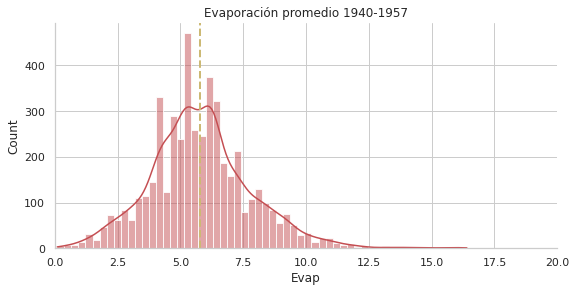

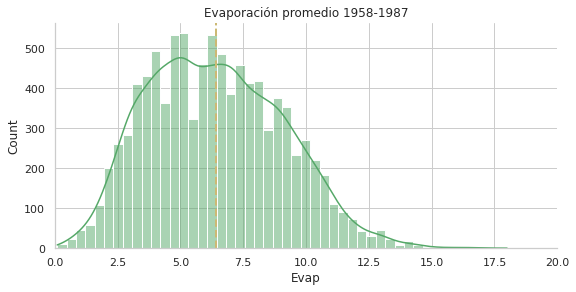

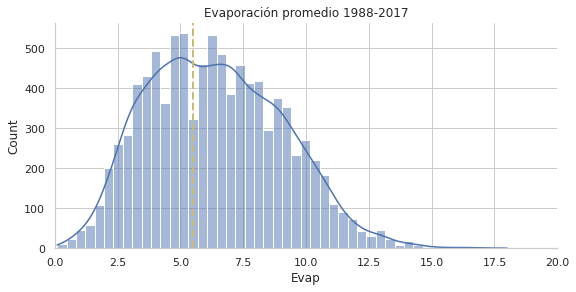

Evaporación promedio (1940-1957) =  5.800988671472715 mm
Evaporación promedio (1958-1987) =  6.406805194805176 mm
Evaporación promedio (1988-2017) =  5.50316533497236 ºC
Desviación estándar de evaporación (1940-1957) =  2.0292857537696865 mm
Desviación estándar de evaporación (1958-1987) =  2.6776833221627023 mm
Desviación estándar de evaporación (1988-2017) =  3.0717658663153347 mm


In [ ]:
#Gráficas de distribuciones de evaporación de las diferentes series de tiempo

g1 = sns.displot(dat_metTS1.Evap, kde=True, color='r', height=4, aspect=2);
plt.axvline(dat_metTS1.Evap.mean(), linestyle='--', linewidth=2, color='y');

g2 = sns.displot(dat_metTS2.Evap, kde=True, color='g', height=4, aspect=2);
plt.axvline(dat_metTS2.Evap.mean(), linestyle='--', linewidth=2, color='y');

g3 = sns.displot(dat_metTS2.Evap, kde=True, color='b', height=4, aspect=2);
plt.axvline(dat_metTS3.Evap.mean(), linestyle='--', linewidth=2, color='y');

g1.set(title='Evaporación promedio 1940-1957');
g2.set(title='Evaporación promedio 1958-1987');
g3.set(title='Evaporación promedio 1988-2017');
g1.set(xlim=(0,20))
g2.set(xlim=(0,20))
g3.set(xlim=(0,20))

plt.show();

print('Evaporación promedio (1940-1957) = ', dat_metTS1.Evap.mean(), 'mm' )
print('Evaporación promedio (1958-1987) = ', dat_metTS2.Evap.mean(), 'mm' )
print('Evaporación promedio (1988-2017) = ', dat_metTS3.Evap.mean(), 'ºC' )

print('Desviación estándar de evaporación (1940-1957) = ', dat_metTS1.Evap.std(), 'mm' )
print('Desviación estándar de evaporación (1958-1987) = ', dat_metTS2.Evap.std(), 'mm' )
print('Desviación estándar de evaporación (1988-2017) = ', dat_metTS3.Evap.std(), 'mm' )

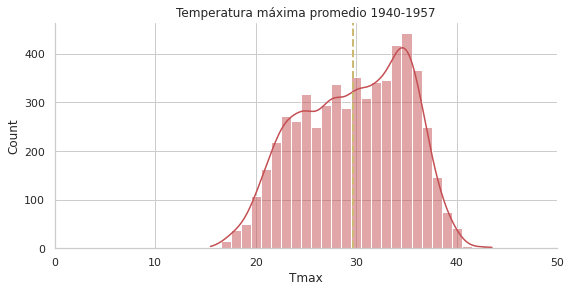

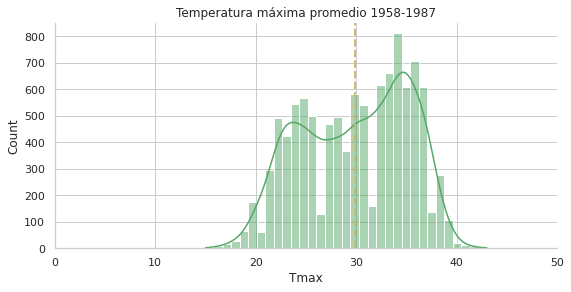

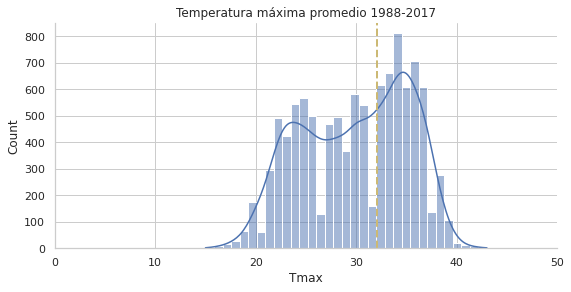

Temperatura máxima promedio (1940-1957) =  29.700052447552455 ºC
Temperatura máxima promedio (1958-1987) =  29.88821006481129 ºC
Temperatura máxima promedio (1988-2017) =  32.036373596275524 ºC
Desviación estándar de temperatura máxima (1940-1957) =  5.290015239272025 ºC
Desviación estándar de temperatura máxima (1958-1987) =  5.323896948069237 ºC
Desviación estándar de temperatura máxima (1988-2017) =  5.514302314726014 ºC


In [ ]:
#Gráficas de distribuciones de evaporación de las diferentes series de tiempo

g1 = sns.displot(dat_metTS1.Tmax, kde=True, color='r', height=4, aspect=2);
plt.axvline(dat_metTS1.Tmax.mean(), linestyle='--', linewidth=2, color='y');

g2 = sns.displot(dat_metTS2.Tmax, kde=True, color='g', height=4, aspect=2);
plt.axvline(dat_metTS2.Tmax.mean(), linestyle='--', linewidth=2, color='y');

g3 = sns.displot(dat_metTS2.Tmax, kde=True, color='b', height=4, aspect=2);
plt.axvline(dat_metTS3.Tmax.mean(), linestyle='--', linewidth=2, color='y');

g1.set(title='Temperatura máxima promedio 1940-1957');
g2.set(title='Temperatura máxima promedio 1958-1987');
g3.set(title='Temperatura máxima promedio 1988-2017');
g1.set(xlim=(0,50))
g2.set(xlim=(0,50))
g3.set(xlim=(0,50))

plt.show();

print('Temperatura máxima promedio (1940-1957) = ', dat_metTS1.Tmax.mean(), 'ºC' )
print('Temperatura máxima promedio (1958-1987) = ', dat_metTS2.Tmax.mean(), 'ºC' )
print('Temperatura máxima promedio (1988-2017) = ', dat_metTS3.Tmax.mean(), 'ºC' )

print('Desviación estándar de temperatura máxima (1940-1957) = ', dat_metTS1.Tmax.std(), 'ºC' )
print('Desviación estándar de temperatura máxima (1958-1987) = ', dat_metTS2.Tmax.std(), 'ºC' )
print('Desviación estándar de temperatura máxima (1988-2017) = ', dat_metTS3.Tmax.std(), 'ºC' )

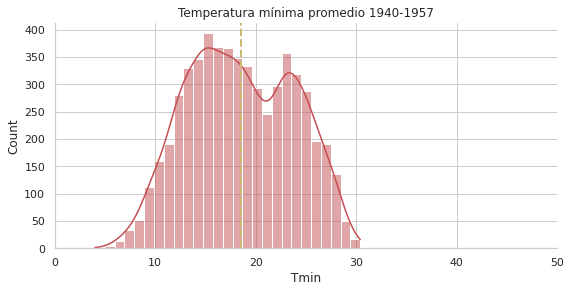

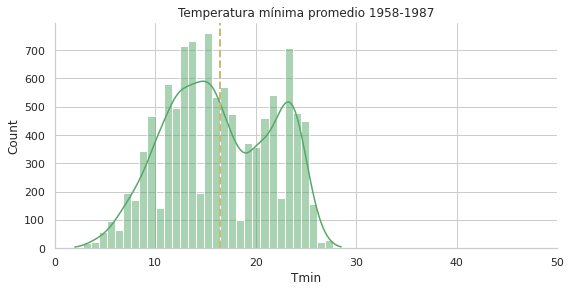

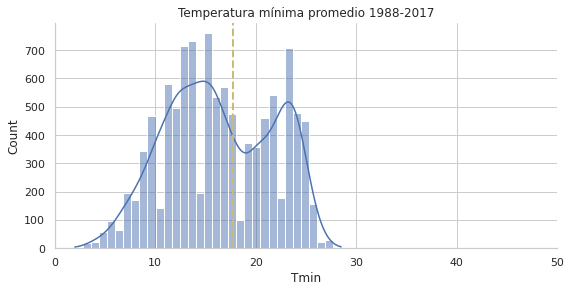

Temperatura mínima promedio (1940-1957) =  18.49416185981471 ºC
Temperatura mínima promedio (1958-1987) =  16.40239229889439 ºC
Temperatura mínima promedio (1988-2017) =  17.703414589609945 ºC
Desviación estándar de temperatura mínima (1940-1957) =  5.2867399932580526 ºC
Desviación estándar de temperatura mínima (1958-1987) =  5.345551994200875 ºC
Desviación estándar de temperatura mínima (1988-2017) =  5.407136650919725 ºC


In [ ]:
#Gráficas de distribuciones de evaporación de las diferentes series de tiempo

g1 = sns.displot(dat_metTS1.Tmin, kde=True, color='r', height=4, aspect=2);
plt.axvline(dat_metTS1.Tmin.mean(), linestyle='--', linewidth=2, color='y');

g2 = sns.displot(dat_metTS2.Tmin, kde=True, color='g', height=4, aspect=2);
plt.axvline(dat_metTS2.Tmin.mean(), linestyle='--', linewidth=2, color='y');

g3 = sns.displot(dat_metTS2.Tmin, kde=True, color='b', height=4, aspect=2);
plt.axvline(dat_metTS3.Tmin.mean(), linestyle='--', linewidth=2, color='y');

g1.set(title='Temperatura mínima promedio 1940-1957');
g2.set(title='Temperatura mínima promedio 1958-1987');
g3.set(title='Temperatura mínima promedio 1988-2017');
g1.set(xlim=(0,50))
g2.set(xlim=(0,50))
g3.set(xlim=(0,50))

plt.show();

print('Temperatura mínima promedio (1940-1957) = ', dat_metTS1.Tmin.mean(), 'ºC' )
print('Temperatura mínima promedio (1958-1987) = ', dat_metTS2.Tmin.mean(), 'ºC' )
print('Temperatura mínima promedio (1988-2017) = ', dat_metTS3.Tmin.mean(), 'ºC' )

print('Desviación estándar de temperatura mínima (1940-1957) = ', dat_metTS1.Tmin.std(), 'ºC' )
print('Desviación estándar de temperatura mínima (1958-1987) = ', dat_metTS2.Tmin.std(), 'ºC' )
print('Desviación estándar de temperatura mínima (1988-2017) = ', dat_metTS3.Tmin.std(), 'ºC' )